In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os
import matplotlib.pyplot as plt


In [21]:
DATADIR="/media/cap/extra_work/data/road_model"

# Read the data from the CSV files
road_temp_df = pd.read_csv(os.path.join(DATADIR,'FYN_TROAD_glatmodel_data.csv.gz'))
wind_speed_df = pd.read_csv(os.path.join(DATADIR,'FYN_S10m_glatmodel_fcst.csv.gz'))
wind_dir_df = pd.read_csv(os.path.join(DATADIR,'FYN_D10m_glatmodel_fcst.csv.gz'))
cloud_cover_df = pd.read_csv(os.path.join(DATADIR,'FYN_CCtot_glatmodel_fcst.csv.gz'))

# Drop unnecessary columns
road_temp_df = road_temp_df.drop(columns=['model_type', 'model_ID'])
wind_speed_df = wind_speed_df.drop(columns=['model_type', 'model_ID'])
wind_dir_df = wind_dir_df.drop(columns=['model_type', 'model_ID'])
cloud_cover_df = cloud_cover_df.drop(columns=['model_type', 'model_ID'])

# Rename columns for merging
wind_speed_df = wind_speed_df.rename(columns={'forecast_temp': 'S10m'})
wind_dir_df = wind_dir_df.rename(columns={'forecast_temp': 'D10m'})
cloud_cover_df = cloud_cover_df.rename(columns={'forecast_temp': 'CCtot'})

# Convert init_time and validity_time to datetime format
road_temp_df['init_time'] = pd.to_datetime(road_temp_df['init_time'])
road_temp_df['validity_time'] = pd.to_datetime(road_temp_df['validity_time'])

wind_speed_df['init_time'] = pd.to_datetime(wind_speed_df['init_time'])
wind_speed_df['validity_time'] = pd.to_datetime(wind_speed_df['validity_time'])

wind_dir_df['init_time'] = pd.to_datetime(wind_dir_df['init_time'])
wind_dir_df['validity_time'] = pd.to_datetime(wind_dir_df['validity_time'])

cloud_cover_df['init_time'] = pd.to_datetime(cloud_cover_df['init_time'])
cloud_cover_df['validity_time'] = pd.to_datetime(cloud_cover_df['validity_time'])

# Merge the dataframes on init_time, validity_time, and lead_hrs
merged_df = pd.merge(road_temp_df, wind_speed_df, on=['site_ID', 'init_time', 'validity_time', 'lead_hrs'])
merged_df = pd.merge(merged_df, wind_dir_df, on=['site_ID', 'init_time', 'validity_time', 'lead_hrs'])
merged_df = pd.merge(merged_df, cloud_cover_df, on=['site_ID', 'init_time', 'validity_time', 'lead_hrs'])



In [22]:
merged_df

,site_ID,init_time,validity_time,lead_hrs,forecast_temp,TROAD,S10m,D10m,CCtot
0,302400,2023-01-11 00:00:00+00:00,2023-01-11 06:00:00+00:00,6,7.30,8.20000,10,213,1.00
1,302400,2023-01-11 00:00:00+00:00,2023-01-11 12:00:00+00:00,12,8.22,9.60000,5,208,0.32
2,302400,2023-01-11 00:00:00+00:00,2023-01-11 18:00:00+00:00,18,4.80,5.90000,7,213,0.85
3,302400,2023-01-11 00:00:00+00:00,2023-01-12 00:00:00+00:00,24,5.34,6.00000,10,181,1.00
4,302400,2023-01-12 00:00:00+00:00,2023-01-12 06:00:00+00:00,6,4.51,5.00000,5,204,1.00
...,...,...,...,...,...,...,...,...,...
559497,991000,2023-03-29 23:00:00+00:00,2023-03-30 17:00:00+00:00,18,9.35,12.50920,7,215,1.00
559498,991000,2023-03-29 23:00:00+00:00,2023-03-30 23:00:00+00:00,24,7.67,8.58974,8,234,1.00
559499,991000,2023-03-30 23:00:00+00:00,2023-03-31 05:00:00+00:00,6,8.35,8.11355,4,217,1.00
559500,991000,2023-03-30 23:00:00+00:00,2023-03-31 11:00:00+00:00,12,10.58,12.50920,3,134,1.00


In [23]:
#select one station and one cycle
station_select = 302400
cycle_select = 0

merged_df = merged_df[(merged_df['init_time'].dt.hour == 0) & (merged_df["site_ID"] == 302400)]

merged_df

,site_ID,init_time,validity_time,lead_hrs,forecast_temp,TROAD,S10m,D10m,CCtot
0,302400,2023-01-11 00:00:00+00:00,2023-01-11 06:00:00+00:00,6,7.30,8.2,10,213,1.00
1,302400,2023-01-11 00:00:00+00:00,2023-01-11 12:00:00+00:00,12,8.22,9.6,5,208,0.32
2,302400,2023-01-11 00:00:00+00:00,2023-01-11 18:00:00+00:00,18,4.80,5.9,7,213,0.85
3,302400,2023-01-11 00:00:00+00:00,2023-01-12 00:00:00+00:00,24,5.34,6.0,10,181,1.00
4,302400,2023-01-12 00:00:00+00:00,2023-01-12 06:00:00+00:00,6,4.51,5.0,5,204,1.00
...,...,...,...,...,...,...,...,...,...
347359,302400,2023-03-30 00:00:00+00:00,2023-03-30 18:00:00+00:00,18,7.93,8.7,7,211,1.00
347360,302400,2023-03-30 00:00:00+00:00,2023-03-31 00:00:00+00:00,24,7.39,7.8,7,235,1.00
347361,302400,2023-03-31 00:00:00+00:00,2023-03-31 06:00:00+00:00,6,8.08,8.4,3,200,1.00
347362,302400,2023-03-31 00:00:00+00:00,2023-03-31 12:00:00+00:00,12,13.56,13.4,2,167,1.00


In [30]:
# Prepare the feature matrix X and the target vector y
X = merged_df[['forecast_temp', 'S10m', 'D10m', 'CCtot']]
y = merged_df['TROAD']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y, merged_df.index, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the observed road temperature on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# If you want to see the coefficients of the model
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Mean Squared Error: 1.7179550157299022
R-squared: 0.8588934787557533
Model Coefficients:
forecast_temp: 0.8706477684864428
S10m: 0.1131519996858681
D10m: -0.002821948122378032
CCtot: -0.16885073857286928


In [45]:
X_test

,forecast_temp,S10m,D10m,CCtot
73,5.81,7,242,1.00
347327,7.37,7,228,1.00
25,1.81,9,255,1.00
347302,0.87,3,144,1.00
9,5.67,11,206,1.00
...,...,...,...,...
347266,1.08,9,195,1.00
347255,13.75,3,328,0.63
151358,5.80,4,224,1.00
151342,6.35,10,292,1.00


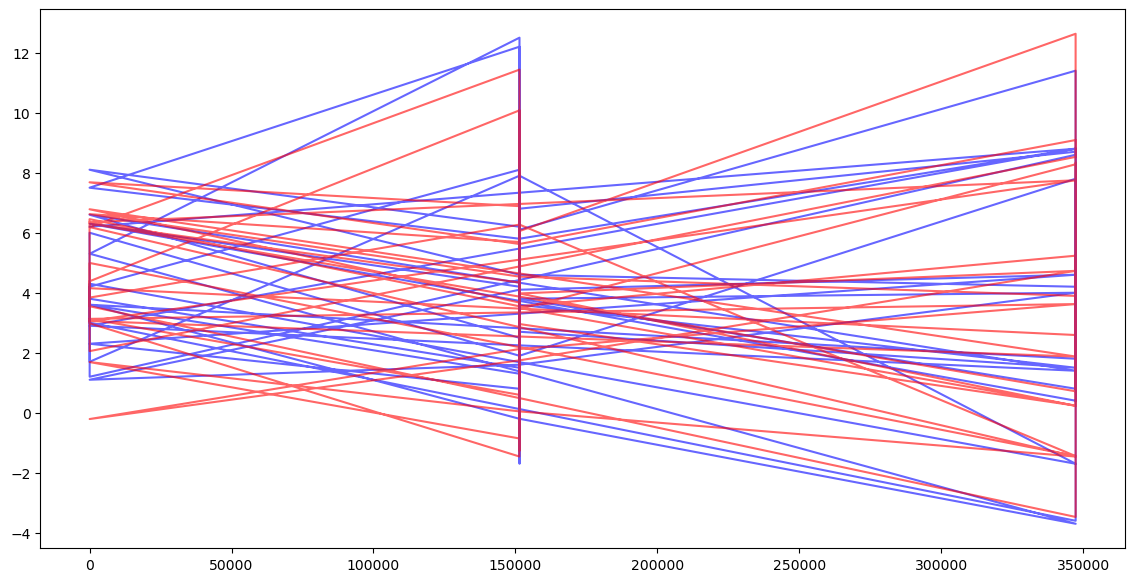

In [31]:
# Plot the observed vs predicted road temperatures
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Observed TROAD', color='blue', alpha=0.6)
plt.plot(X_test.index, y_pred, label='Predicted TROAD', color='red', alpha=0.6)
#merged_test_df = merged_df.iloc[X_test.index]
# Retrieve the validity_time for the test set
validity_time_test = merged_df.loc[test_idx, 'validity_time']


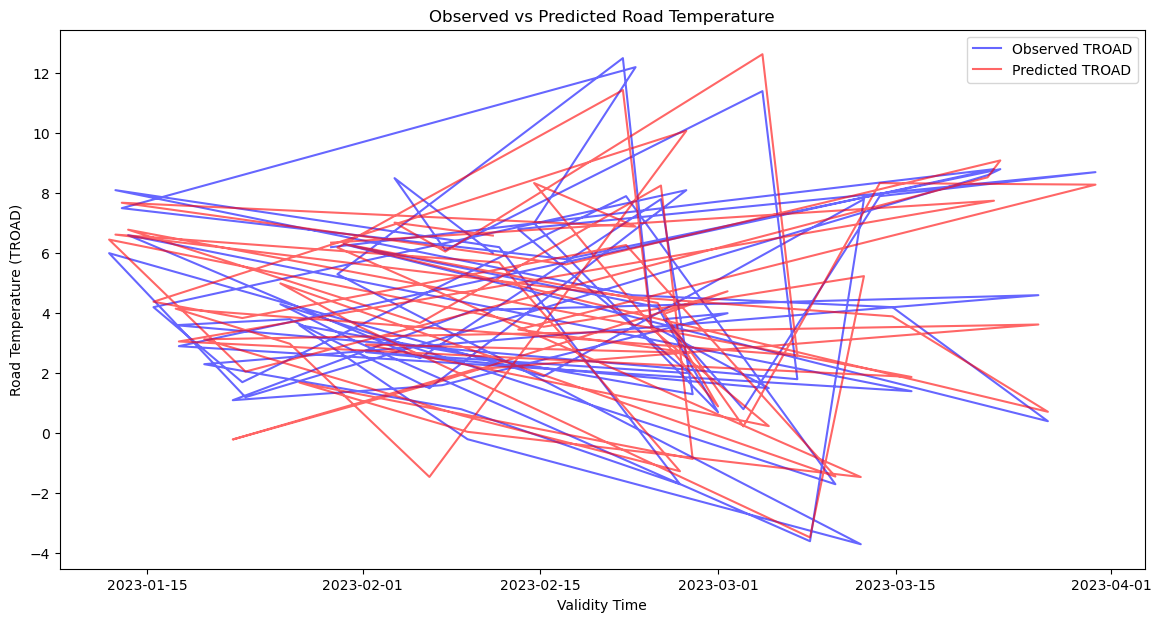

In [32]:
#X_test.index
#merged_df.iloc[X_test.index]
#validity_time_test = merged_test_df['validity_time']
plt.figure(figsize=(14, 7))
plt.plot(validity_time_test, y_test, label='Observed TROAD', color='blue', alpha=0.6)
plt.plot(validity_time_test, y_pred, label='Predicted TROAD', color='red', alpha=0.6)

plt.xlabel('Validity Time')
plt.ylabel('Road Temperature (TROAD)')
plt.title('Observed vs Predicted Road Temperature')
plt.legend()
plt.show()

In [34]:
# Calculate the bias (errors)
original_bias = X_test['forecast_temp'] - y_test
model_bias = y_pred - y_test


In [36]:
model_bias

73        0.149988
347327   -1.052294
25        0.157016
347302    0.472931
9         0.182296
            ...   
347266    0.790760
347255    1.230111
151358   -0.047379
151342   -1.481503
151373    0.585993
Name: TROAD, Length: 64, dtype: float64

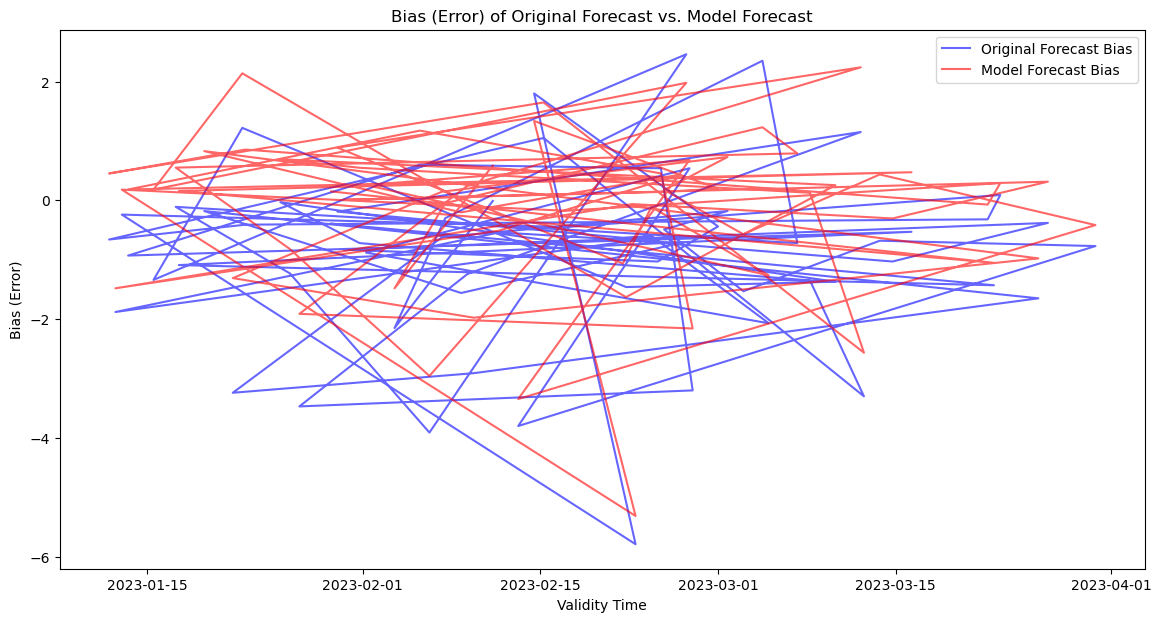

In [33]:

# Plot the original and model bias
plt.figure(figsize=(14, 7))
plt.plot(validity_time_test, original_bias, label='Original Forecast Bias', color='blue', alpha=0.6)
plt.plot(validity_time_test, model_bias, label='Model Forecast Bias', color='red', alpha=0.6)

plt.xlabel('Validity Time')
plt.ylabel('Bias (Error)')
plt.title('Bias (Error) of Original Forecast vs. Model Forecast')
plt.legend()
plt.show()

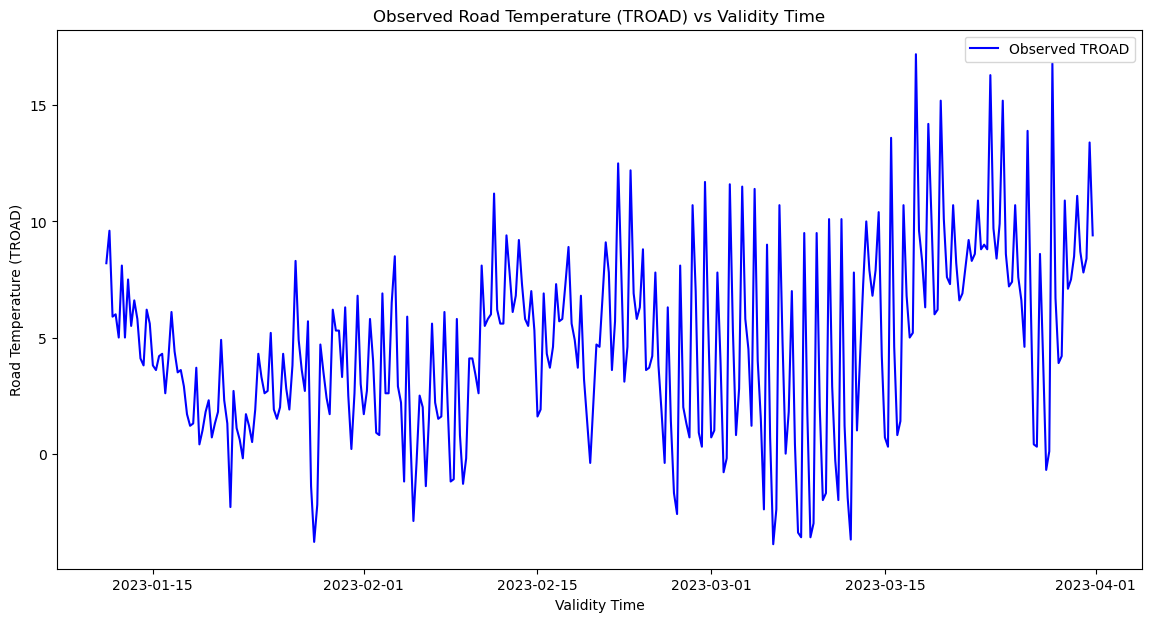

In [38]:
# Plot TROAD versus validity_time
plt.figure(figsize=(14, 7))
plt.plot(merged_df['validity_time'], merged_df['TROAD'], label='Observed TROAD', color='blue')

plt.xlabel('Validity Time')
plt.ylabel('Road Temperature (TROAD)')
plt.title('Observed Road Temperature (TROAD) vs Validity Time')
plt.legend()
plt.show()

In [40]:
merged_df['TROAD_model'] = model.predict(X)


/tmp/ipykernel_143191/3333394705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['TROAD_model'] = model.predict(X)


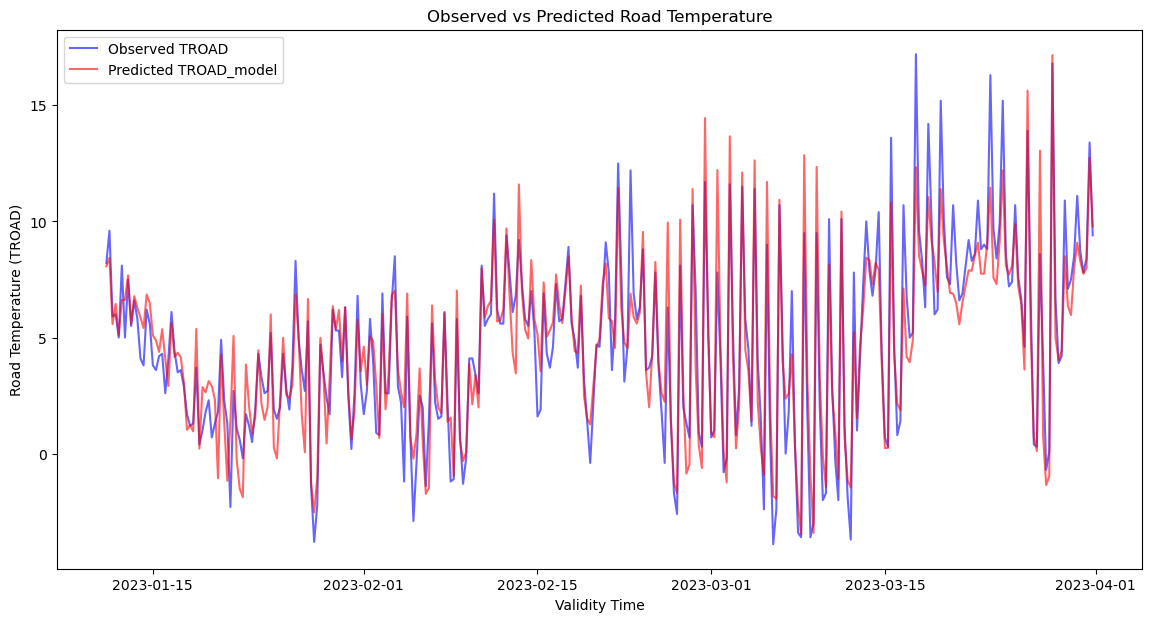

In [41]:
# Plot TROAD and TROAD_model against validity_time
plt.figure(figsize=(14, 7))
plt.plot(merged_df['validity_time'], merged_df['TROAD'], label='Observed TROAD', color='blue', alpha=0.6)
plt.plot(merged_df['validity_time'], merged_df['TROAD_model'], label='Predicted TROAD_model', color='red', alpha=0.6)

plt.xlabel('Validity Time')
plt.ylabel('Road Temperature (TROAD)')
plt.title('Observed vs Predicted Road Temperature')
plt.legend()
plt.show()

/tmp/ipykernel_143191/3748356611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['orig_bias'] = merged_df["forecast_temp"] - merged_df["TROAD"]
/tmp/ipykernel_143191/3748356611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["new_bias"] = merged_df["forecast_temp"] - merged_df["TROAD_model"]


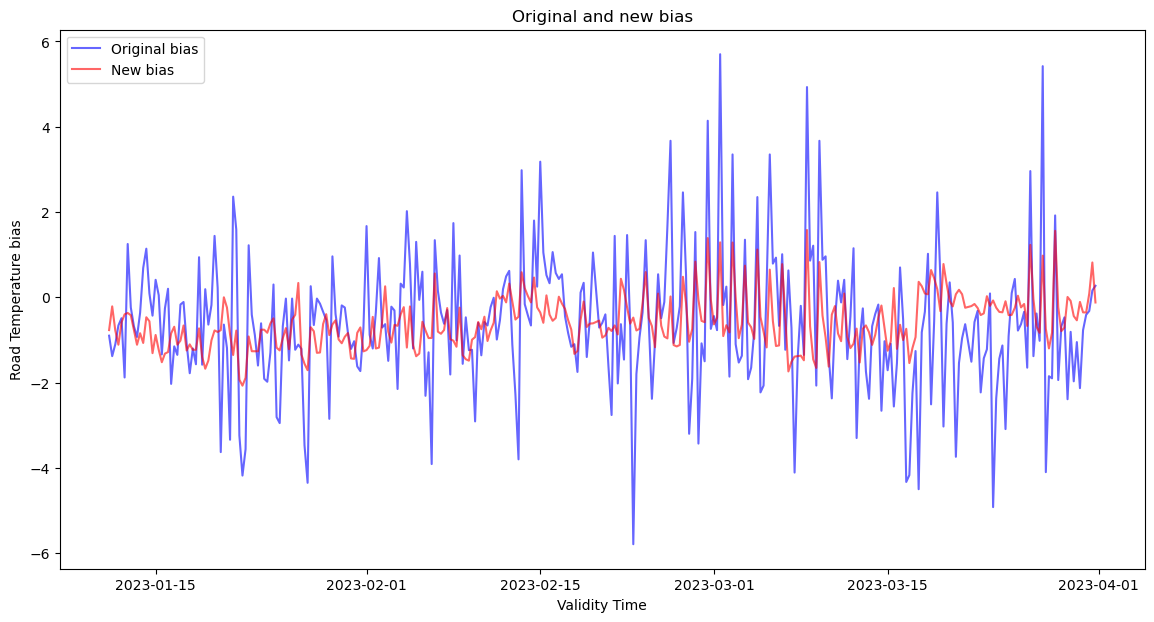

In [42]:
merged_df['orig_bias'] = merged_df["forecast_temp"] - merged_df["TROAD"]
merged_df["new_bias"] = merged_df["forecast_temp"] - merged_df["TROAD_model"]

# Plot TROAD and TROAD_model against validity_time
plt.figure(figsize=(14, 7))
plt.plot(merged_df['validity_time'], merged_df['orig_bias'], label='Original bias', color='blue', alpha=0.6)
plt.plot(merged_df['validity_time'], merged_df['new_bias'], label='New bias', color='red', alpha=0.6)

plt.xlabel('Validity Time')
plt.ylabel('Road Temperature bias')
plt.title('Original and new bias')
plt.legend()
plt.show()

In [4]:
DATADIR="/media/cap/extra_work/data/road_model"
df_glat=pd.read_csv(os.path.join(DATADIR,"TROAD_glatmodel_data.csv.gz"),compression="gzip")


obs_temp_array = df_glat["obs_temp"].values.reshape(-1, 1)

forecast_temp_array = df_glat["forecast_temp"].values.reshape(-1, 1)

# Convert the "obs_temp" column to a NumPy array with shape (544920, 1)
obs_temp_array = df_glat["obs_temp"].values.reshape(-1, 1)

# Calculate the bias (forecast_temp - obs_temp)
forecast_error = forecast_temp_array - obs_temp_array
df_glat["validity_time"] = pd.to_datetime(df_glat["validity_time"])


In [ ]:


# Assuming your dataframe is named df
# Calculate the forecast error
df['forecast_error'] = df['observed_road_temp'] - df['forecasted_road_temp']

# Prepare the feature matrix X and the target vector y
X = df[['time_of_day', 'observed_air_temp', 'observed_wind_speed', 'observed_wind_direction']]
y = df['forecast_error']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the forecast error on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# If you want to see the coefficients of the model
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
